## Regression Model for predicting house market values in California

In [88]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import  train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [62]:
data = pd.read_csv("housing.csv")
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


From data information we observe that  some entries  have  null  values in total bedrooms in order to  eliminate those values we drop  entries with null values  resulting to 20433 entries  instead of 20640

### Preprocess Dataset 

In [64]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [65]:
X = data.drop(['median_house_value'], axis=1)
y=data["median_house_value"]

X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) 


In [67]:
train_data = X_train.join(y_train) 


### Histogram version 1

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

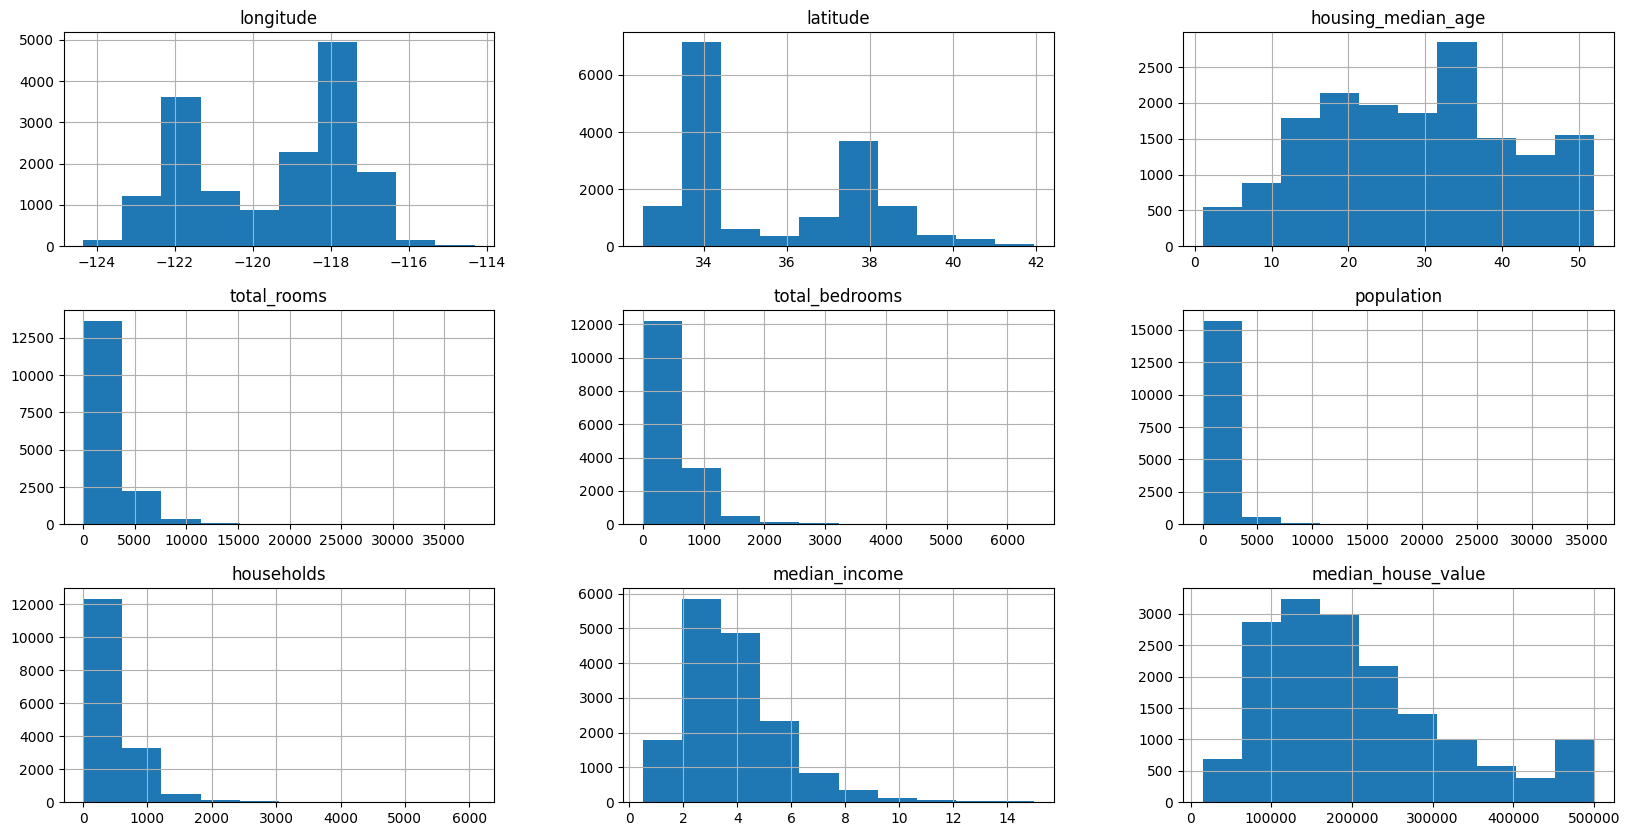

In [68]:
train_data.hist(figsize=(20,10))

From different histograms we observe  that  total_rooms total_bedrooms population  and households plots are far left (lower) so we use natural log transformation in order  to make the distribution more symetric ( like normal distribution)

### Histogram Version 2 

In [69]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

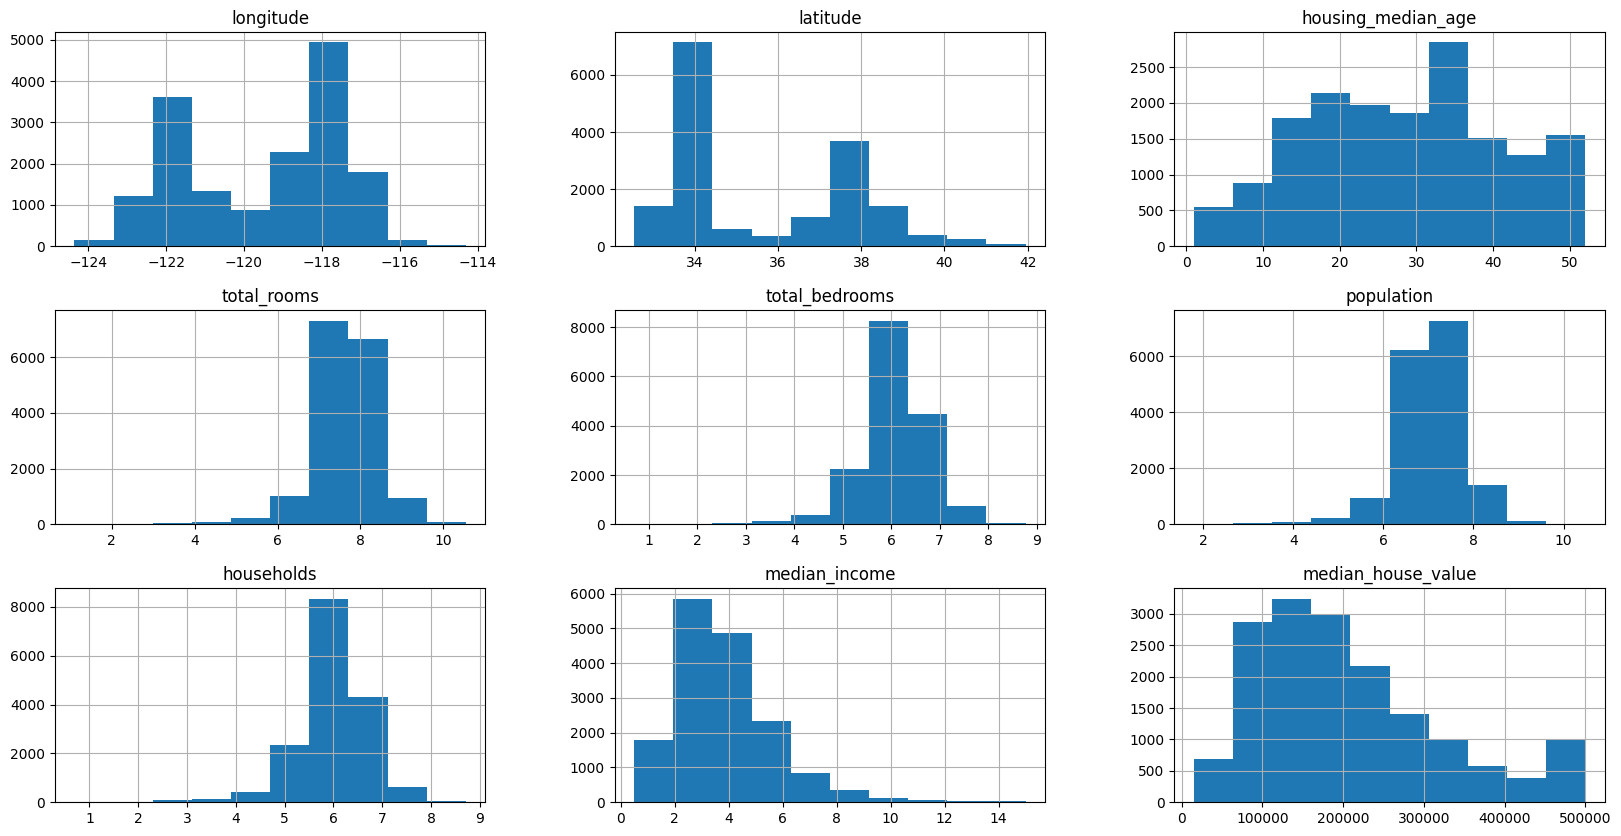

In [70]:
train_data.hist(figsize=(20,10))

### Heatmap 1

<Axes: >

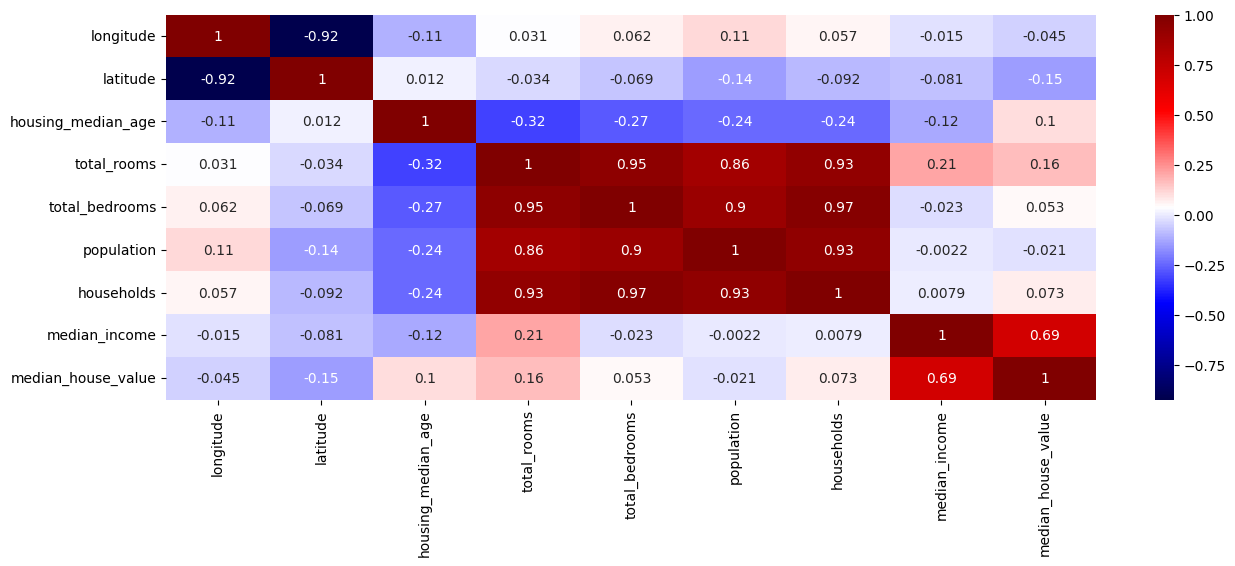

In [71]:
plt.figure(figsize=(15,5))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="seismic")

From the heatmap we see that house value and income  are strongly corelated 

### Heatmap 2 (Including distance from the ocean)

In [72]:
#Transforming categorical data  into indicator variables
train_data =train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1) 


<Axes: >

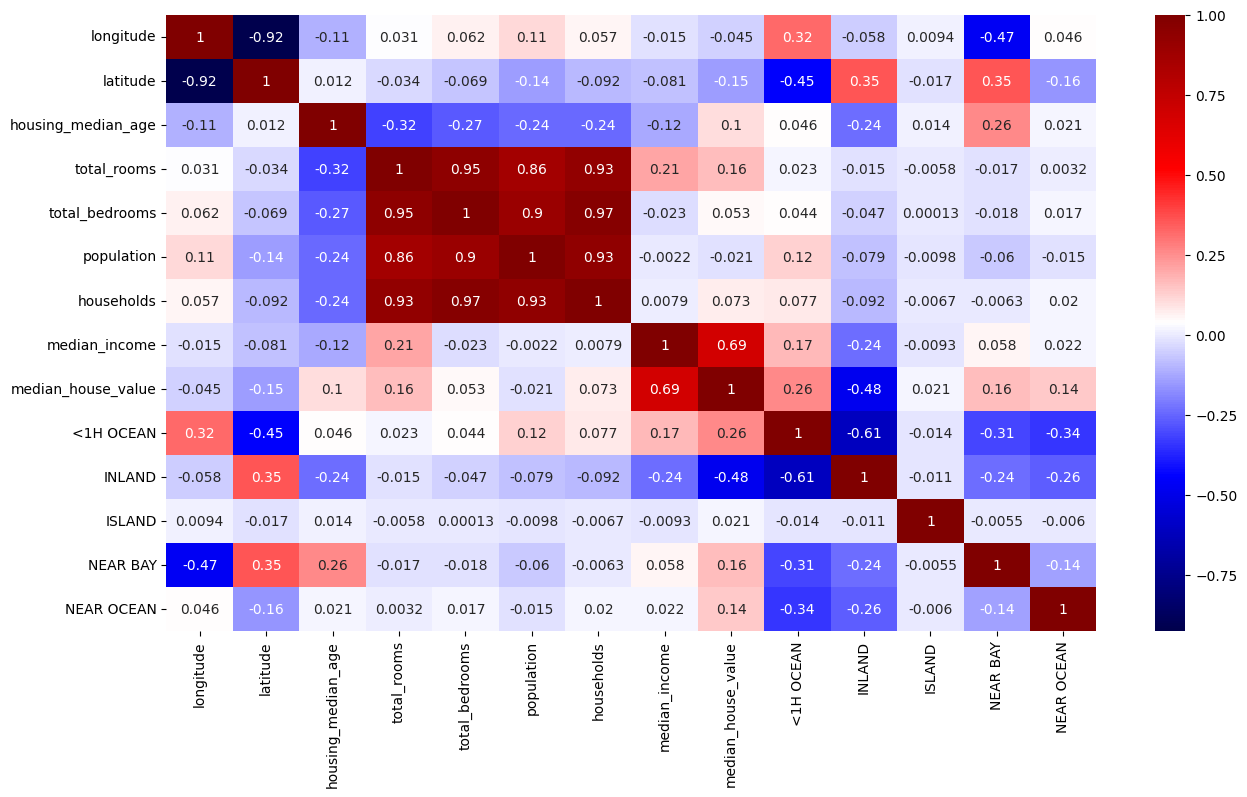

In [73]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="seismic")


This heatmap also includes the location of the house relative to the sea. Houses which are near the sea  tend to have bigger value (Stronger corelated) than  others which are in the inland.

### House prices  on the California Map

<GeoAxes: xlabel='longitude', ylabel='latitude'>

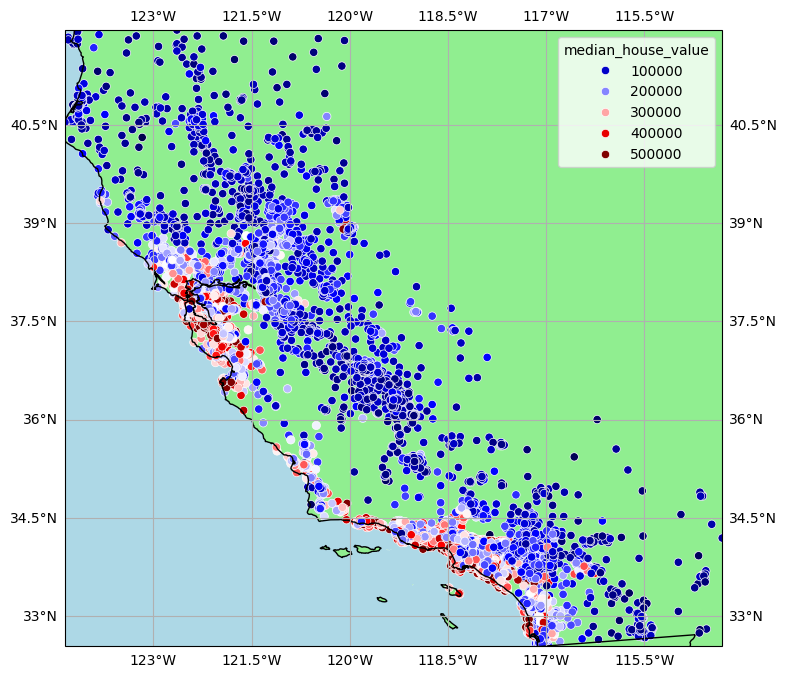

In [74]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER ,LATITUDE_FORMATTER

extent =[train_data["longitude"].min(),train_data["longitude"].max(),
         train_data["latitude"].min(),train_data["latitude"].max()]

fig, my_ax = plt.subplots(figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})

my_ax.set_extent(extent)

my_ax.add_feature(cfeature.LAND, facecolor='lightgreen')
my_ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

my_ax.coastlines()

my_ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
my_ax.gridlines(draw_labels=True, dms=True, xformatter=LONGITUDE_FORMATTER, yformatter=LATITUDE_FORMATTER)


sns.scatterplot(x="longitude",y="latitude",data=train_data, hue="median_house_value",palette="seismic",ax=my_ax)




The scatterplot above depicts median house value  in the california map and validates the conclusion that houses which are in the coast tends to have more value.

### Heatmap 3 (Including  bedroom_ratio and house_rooms)

<Axes: >

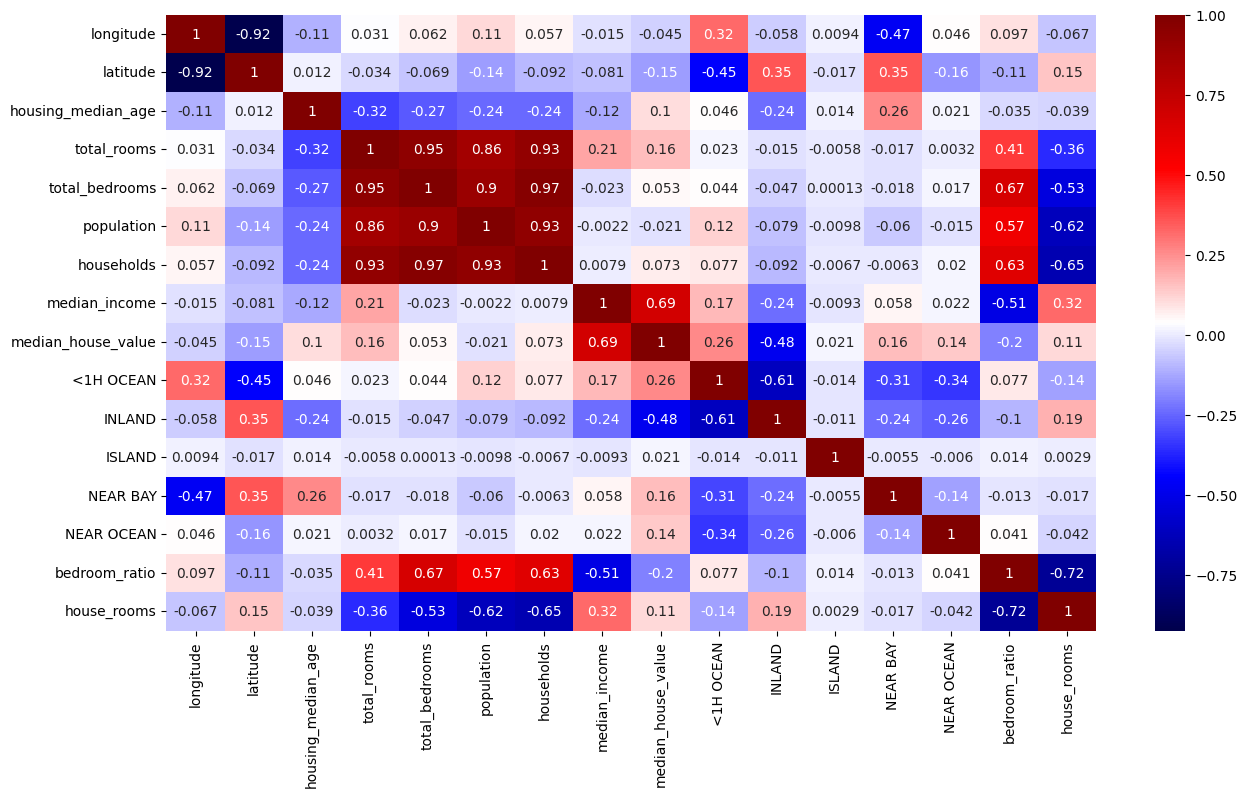

In [75]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["house_rooms"] = train_data["total_rooms"] / train_data["households"]

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="seismic")

We see that total bedrooms  total rooms and households have corelation close to 0 to median house value so we extract 2 new features bedroom_ratio and house_rooms. These features have better corelation with the house value as we  observe from this heatmap

### Linear Regression model

In [76]:
X_train =train_data.drop(['median_house_value'],axis =1) 
y_train =train_data["median_house_value"]

reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [77]:
test_data = X_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data =test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1) 

test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["house_rooms"] = test_data["total_rooms"] / test_data["households"]

X_test =test_data.drop(['median_house_value'],axis =1) 
y_test =test_data["median_house_value"]



In [89]:
y_pred = reg.predict(X_test)

print("R^2  score:",reg.score(X_test,y_test))
print("Mean Squared Error (MSE):",mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):",mean_absolute_error(y_test, y_pred))

R^2  score: 0.6671682760499495
Mean Squared Error (MSE): 4401521465.468188
Mean Absolute Error (MAE): 48261.04626444953


### Plot of  linear regression model predictions

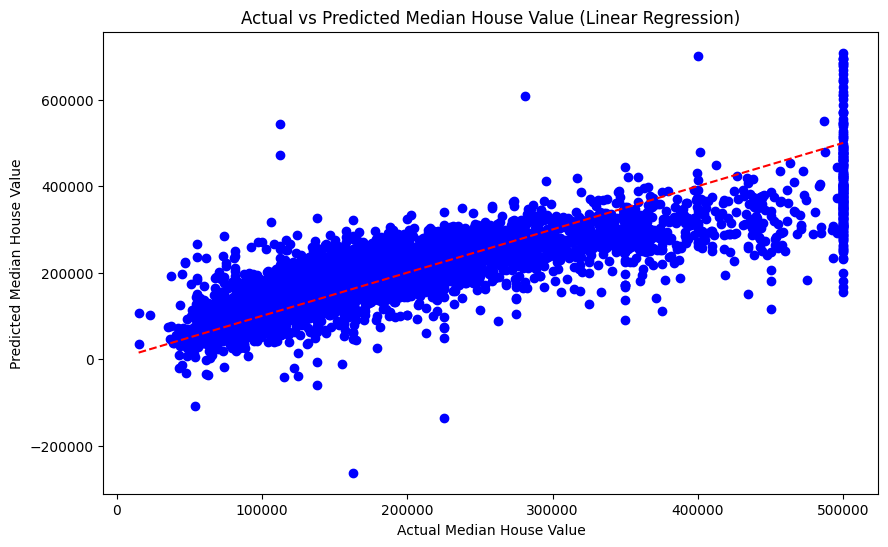

In [79]:
y_pred = reg.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')

plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Value (Linear Regression)')
plt.show()



This model tends to perform good on small values but in larger values tends to underestimate the price of the house 

### Random Forest Model 

#### Define parameters for hypermeters tuning

In [84]:
parameters_grid = {'n_estimators':[100 , 200 ],
                   'max_depth':[10, 15 ],
                   'min_samples_split': [2, 5],
                   'min_samples_leaf': [1, 2]
                   }

In [85]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=parameters_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters: ", best_params)
best_rf = grid_search.best_estimator_

Best parameters:  {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [90]:
y_pred = best_rf.predict(X_test)

print("R^2  score:",best_rf.score(X_test,y_test))
print("Mean Squared Error (MSE):",mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):",mean_absolute_error(y_test, y_pred))


R^2  score: 0.8183133822767368
Mean Squared Error (MSE): 2402708306.787698
Mean Absolute Error (MAE): 32826.503234152166


### Plot of Random Forest Model Predictions

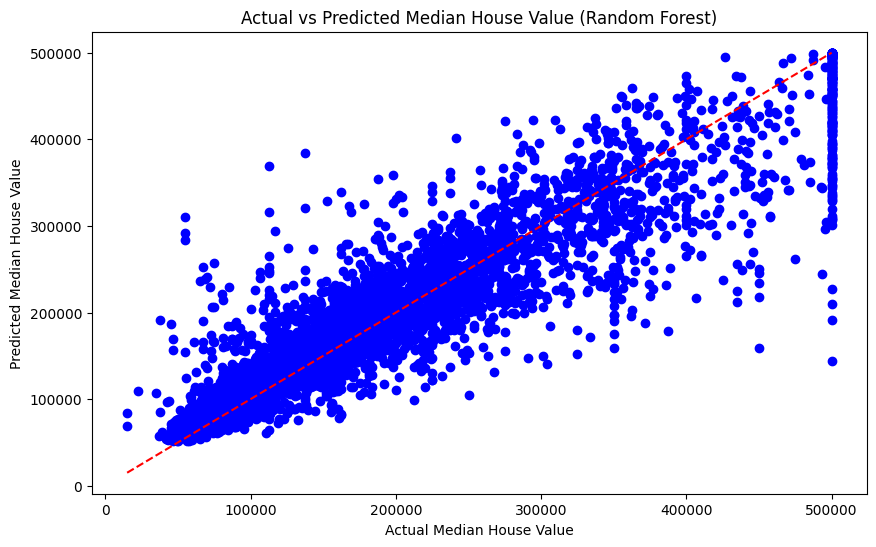

In [87]:
y_pred = best_rf.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')

plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Value (Random Forest)')
plt.show()


This model seems to perform better because the scatterplot tends to follow the line with more accuracy